# Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import glob
from scipy.special import factorial

# File reading

In [2]:
def readDotFit(path):
    f1 = open(path, "r")

    #ignore everything until [result] line
    s = f1.readline()
    while "result" not in s:
        s = f1.readline()

    #because there is a space between the [ and the first number, lines can be processed using split(" ")
    channels = np.array(f1.readline().split(" ")[3:-1], dtype=float)
    energy1 = np.array(f1.readline().split(" ")[3:-1], dtype=float)
    ydata1 = np.array(f1.readline().split(" ")[3:-1], dtype=float)
    yfit1 = np.array(f1.readline().split(" ")[3:-1], dtype=float)
    bg1 = np.array(f1.readline().split(" ")[3:-1], dtype=float)

    bg1 = np.array(bg1, dtype=int)

    f1.close()

    return energy1, ydata1, yfit1, bg1, channels

In [8]:
dat = {10:   readDotFit(glob.glob("10s_report/*.fit")[0]),
       20:   readDotFit(glob.glob("20s_report/*.fit")[0]),
       30:   readDotFit(glob.glob("30s_report/*.fit")[0]),
       60:   readDotFit(glob.glob("60s_report/*.fit")[0]),
       120:  readDotFit(glob.glob("2m_report/*.fit")[0]),
       300:  readDotFit(glob.glob("5m_report/*.fit")[0]),
       600:  readDotFit(glob.glob("10m_report/*.fit")[0]),
       1200: readDotFit(glob.glob("20m_report/*.fit")[0]),
       1800: readDotFit(glob.glob("30m_report/*.fit")[0]),
       3600: readDotFit(glob.glob("60m_report/*.fit")[0])}

#channel of data at index [0]
#want to use data from channels 510 to 597, which is a region with consistent noise amplitude
#weak Ca Kb peak at around 500
fc = int(dat[10][4][0])

keys = np.array(list(dat))

# Plotting

## Raw plots of data

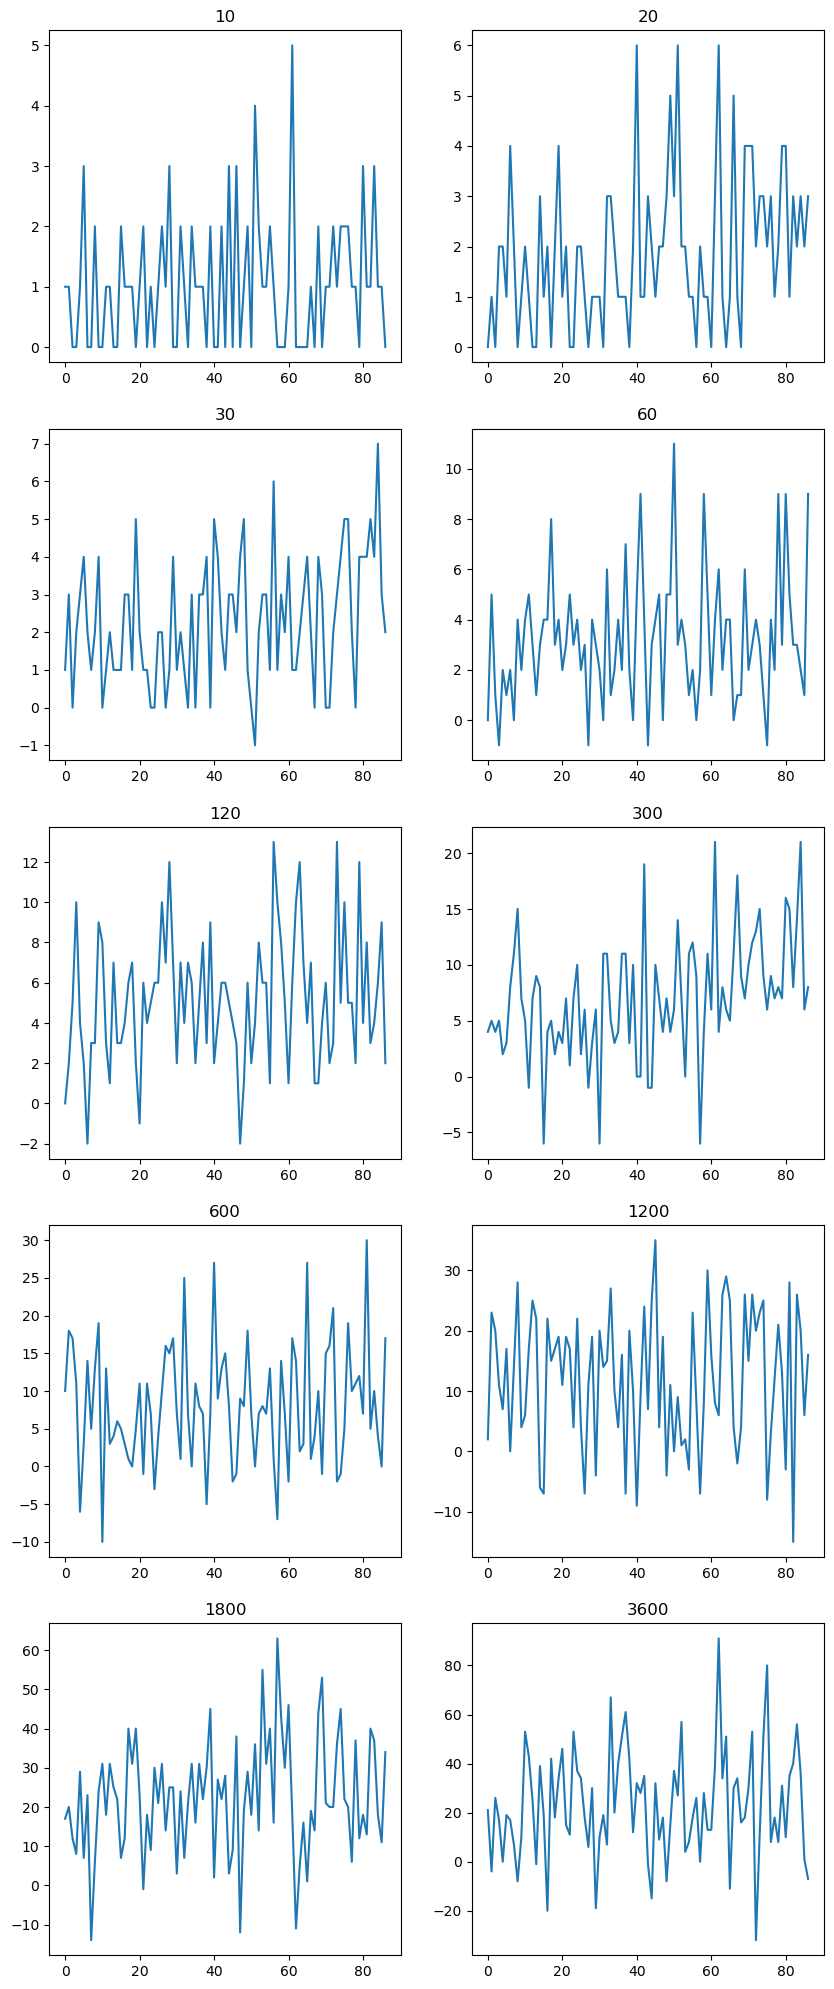

In [10]:
f, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 25))

axs = axs.reshape(10)

for i in range(0, axs.size):
    #round to nearest int
    axs[i].plot(np.rint(dat[keys[i]][1][510-fc:597-fc] - dat[keys[i]][3][510-fc:597-fc]), "-")
    axs[i].set_title(str(keys[i]))

plt.show()

# Histograms

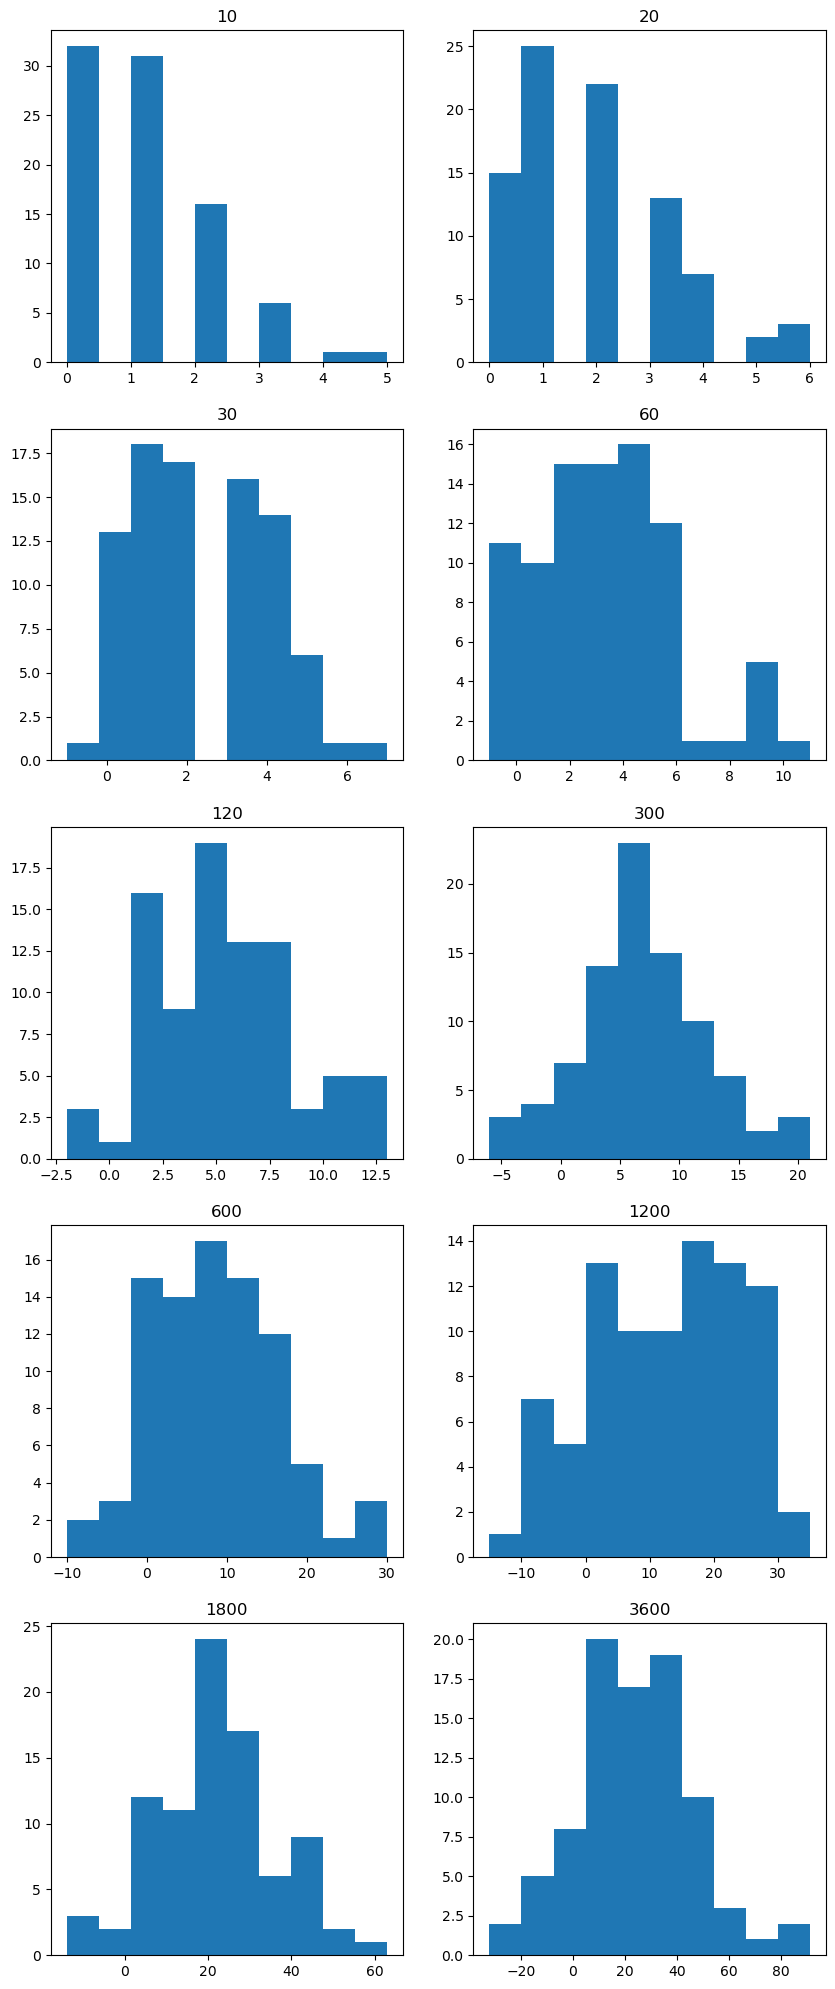

In [15]:
f, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 25))

axs = axs.reshape(10)

#consider customizing the bins
for i in range(0, axs.size):
    #round to nearest int
    axs[i].hist(np.rint(dat[keys[i]][1][510-fc:597-fc] - dat[keys[i]][3][510-fc:597-fc]))
    axs[i].set_title(str(keys[i]))

plt.show()

## Poisson probability plots

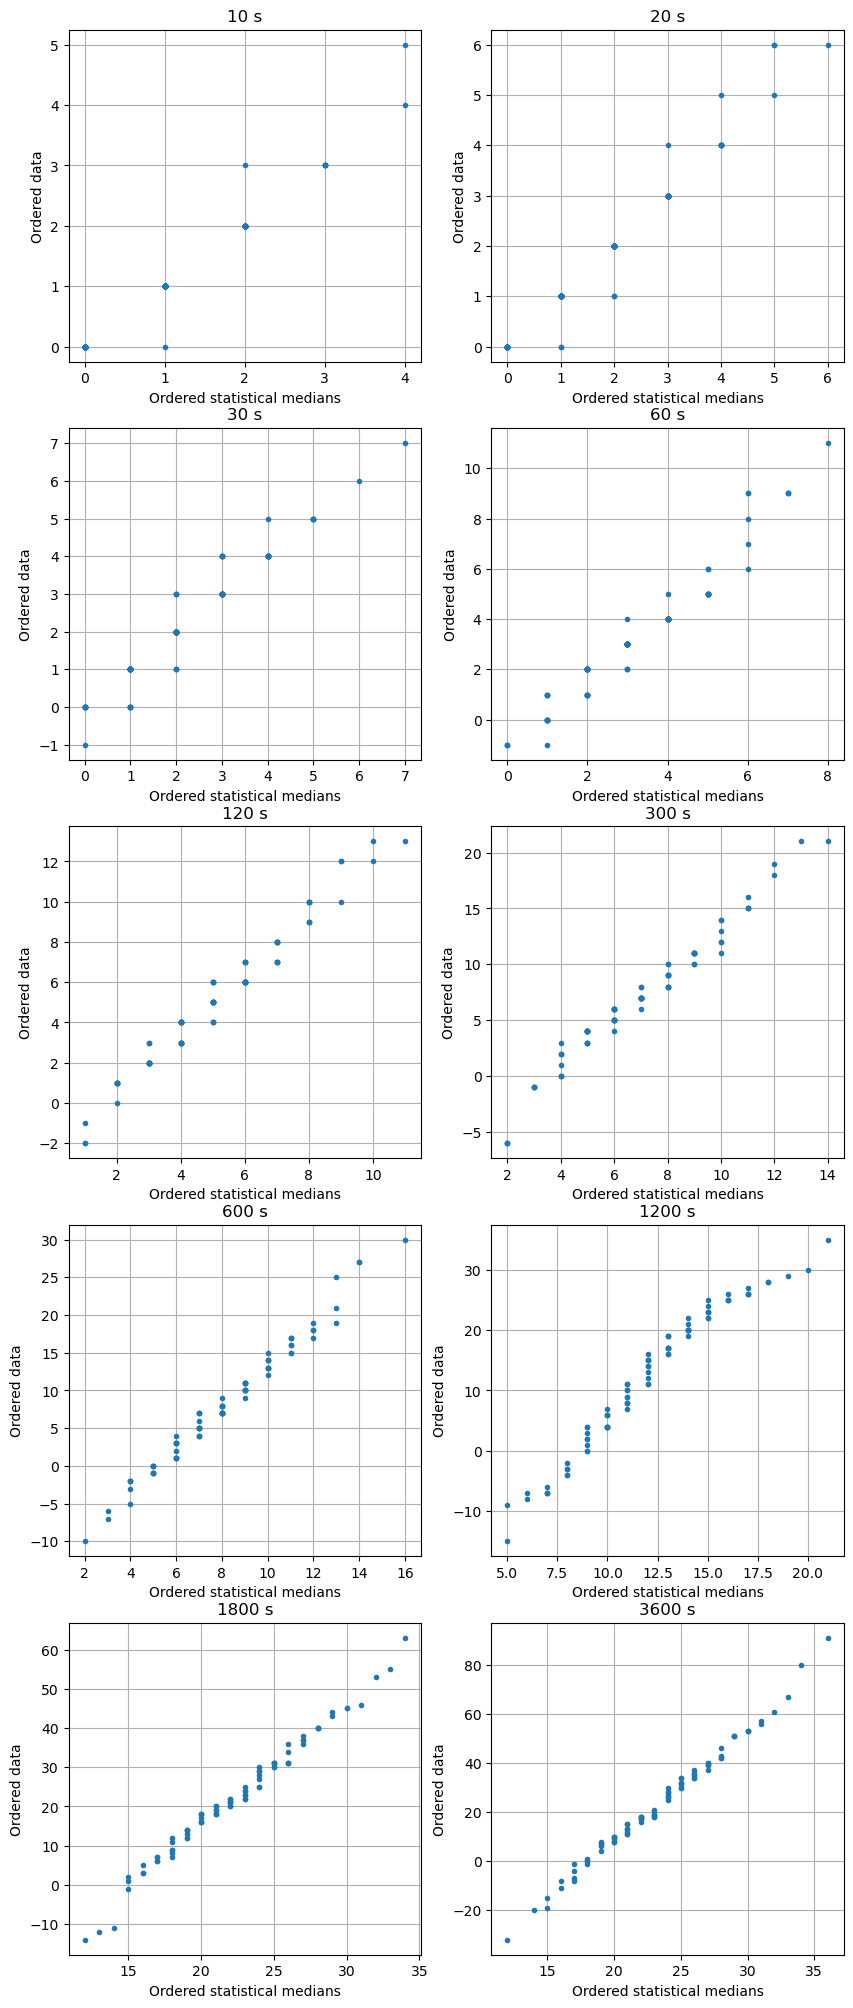

In [5]:
def probPlot(ax, dat, title):
    
    osm, osr = stats.probplot(dat, (np.average(dat)), dist=stats.poisson, fit=False)
    ax.plot(osm, osr, ".") #plot data
    #ax.plot(osm, osm, "-") #plot line y=x
    ax.grid(True)
    ax.ticklabel_format(scilimits=(-5,5))
    ax.set_title(title)
    ax.set_xlabel("Ordered statistical medians")
    ax.set_ylabel("Ordered data")

f, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 25))

axs = axs.reshape(10)

for i in range(0, axs.size):
    probPlot(axs[i], np.rint(dat[keys[i]][1][510-fc:597-fc] - dat[keys[i]][3][510-fc:597-fc]), str(keys[i])+" s")

plt.show()

## Plot variance vs measurement time

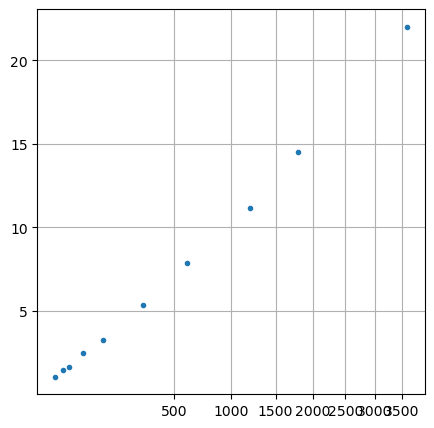

In [16]:
f, ax = plt.subplots(figsize=(5, 5))

stds=[]

for i in keys:
    stds.append(np.std(np.rint(dat[i][1][510-fc:597-fc] - dat[i][3][510-fc:597-fc])))

stds = np.array(stds)

ax.plot(keys, stds, ".")

ax.set_xscale("function", functions=(np.sqrt, lambda x: x*x))

ax.grid(True)

plt.show()